In [2]:
import sys 
sys.path.append("..")

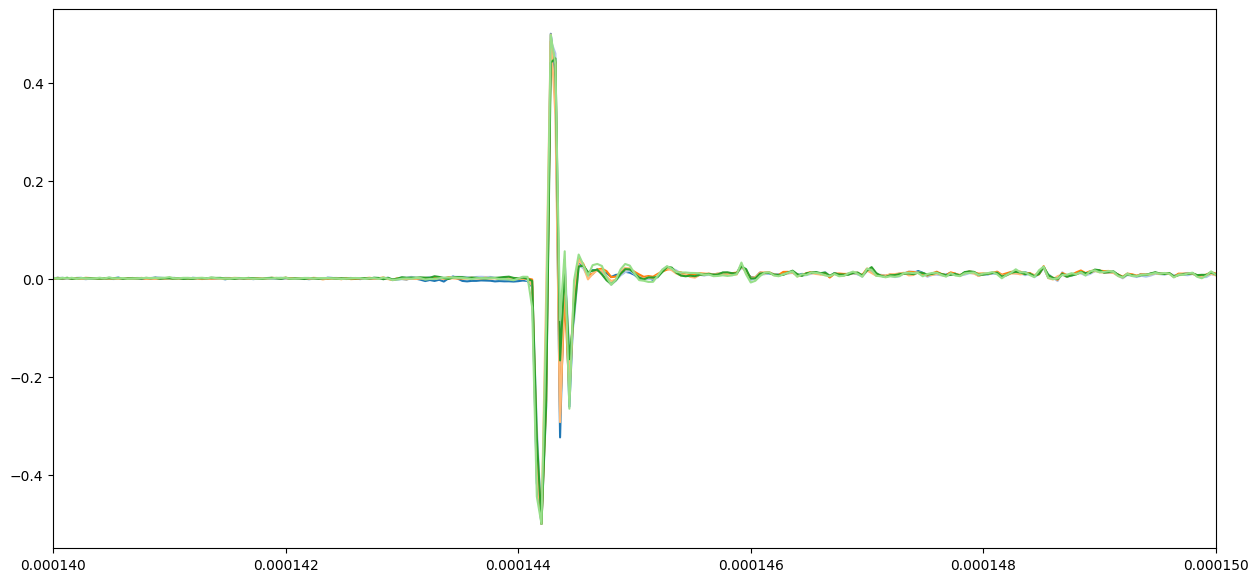

In [3]:
import analysis
import matplotlib.pyplot as plt
import numpy as np
cmap = plt.colormaps['tab20']
s = analysis.System("sagnac", ["../../data/20240515/cylindricaltargetablation/iter_0.tdms", "../../data/20240515/cylindricaltargetablation_wall3-9cmfromfrontwall/iter_0.tdms", "../../data/20240515/cylindricaltargetablation_wall3-0cmfromfrontwall/iter_0.tdms", "../../data/20240515/cylindricaltargetablation_wall2-5cmfromfrontwall/iter_0.tdms", "../../data/20240515/cylindricaltargetablation_wall2-0cmfromfrontwall/iter_0.tdms", "../../data/20240515/cylindricaltargetablation_wall1-5cmfromfrontwall/iter_0.tdms"], channel = "X")
null_indexes = [np.array([], dtype = int) for x in range(0, len(s.get_data()))]
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.set_xlim([0.00014, 0.00015])
for i in range(len(s.get_data())):
    for j, c in enumerate(s.get_data()[i].collection):
        if np.max(c.x) < 0.1:
            null_indexes[i] = np.append(null_indexes[i], j)
    null_indexes[i] = np.flip(np.array(null_indexes[i]))
    for k in null_indexes[i]:
        s.get_data()[i].collection = np.delete(s.get_data()[i].collection, int(k))
    s.get_data()[i].aggrigate(collection_slice = slice(0, len(s.get_data()[i].collection), 1))
    
    ax.plot(s.get_data()[i].agg.t, s.get_data()[i].agg.x, c = cmap.colors[i])
initial_signal = [s.get_data()[i].collection[0].t[np.where(np.max(s.get_data()[i].agg.x) == s.get_data()[i].agg.x)[0][0]] for i in range(len(s.get_data()))]
theo_dist_of_flight = np.array([np.sqrt(2.1 ** 2 + 1.15 ** 2), np.sqrt(3 ** 2 + 1.15 ** 2), np.sqrt(3.5 ** 2 + 1.15 ** 2), np.sqrt(4 ** 2 + 1.15 ** 2), np.sqrt(4.5 ** 2 + 1.15 ** 2)]) / 100
theo_time_of_flight = (theo_dist_of_flight * 2) / 1481
act_time_of_flight = [initial_signal[1] + theo_time_of_flight[0], 0.0001833, 0.000191, 0.00019552, 0.0002023]
far_theo_dist_of_flight = np.array([np.sqrt(2.1 ** 2 + 6.15 ** 2), np.sqrt(3 ** 2 + 6.15 ** 2), np.sqrt(3.5 ** 2 + 6.15 ** 2), np.sqrt(4 ** 2 + 6.15 ** 2), np.sqrt(4.5 ** 2 + 6.15 ** 2)]) / 100
far_theo_time_of_flight = (far_theo_dist_of_flight * 2) / 1481
for i in range(len(theo_time_of_flight)):
    # ax.axvline(initial_signal[i + 1] + theo_time_of_flight[i], c = cmap.colors[i + 1])
    ax.axvline(act_time_of_flight[i], c = cmap.colors[i + 1])
    ax.axvline(act_time_of_flight[i] + far_theo_time_of_flight[i], c = cmap.colors[i + 1])
plt.show()
